# Hypothesis Testing

A hypothesis is an educated guess about something in the world around you. It should be testable, either by experiment or observation.

For a Data Scientist, Hypothesis Testing is a statistical foundational skill. So it is important for a DAta Scientist to learn about Hypothesis Testing.

# Effect Size

Effect size is used to quantify the size of the difference between two groups under observation. Effect sizes are easy to calculate, understand and apply to any measured outcome and are applicable to a multitude of study domains. It is highly valuable towards quantifying the effectiveness of a particular intervention, relative to some comparison. Measuring effect size allows scientists to go beyond the obvious and simplistic 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts?'.

[More on effect size](https://www.slideshare.net/gaetanlion/effect-size-presentation)

Effect size measurement places its emphasis on the effect size only, unlike statistical significance which combines effect size and sample size, thus promoting a more scientific approach towards knowledge accumulation. Effect size is therefore routinely used in **Meta-Analysis** i.e. for combining and comparing estimates from different studies conducted on different samples. 

By increasing sample size, you can show there is a statistically significant difference between two means. However, **statistically significant does not necessarily imply “significant."**.

>**P value** = probability sample means are the same.

>(1 – P) or **Confidence Level** = probability sample means are different.

>**Effect Size** = how different sample means are


In light of this, it is possible to achieve highly significant p-values for effect sizes that have no practical significance. In contrast, study designs with low power can produce non-significant p-values for effect sizes of great practical importance.

In [3]:
# Import necessary modules 
from __future__ import print_function, division
import numpy as np

# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

# seed the random number generator so you get the same results
np.random.seed(42)

In [4]:
#Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = scipy.stats.norm(male_mean, male_sd)

In [5]:
# male_height is a SciPy rv object which represents a normal continuous random variable
male_height.args

(178, 7.7)

In [6]:
female_mean = 163
female_sd = 7.3
female_height = scipy.stats.norm(female_mean, female_sd)

## Evaluate Probability Density Function (PDF)
A continuous random variable, as calculated above, takes on an uncountably infinite number of possible values.

For a discrete random variable, X, that takes on a finite or infinite number of possible values, we determine P(X = x) for all of the possible values of X and call it the probability mass function (PMF).

For continuous random variables, as in the case of heights, the probability that X takes on any particular value x is 0. That is, finding P(X = x) for a continuous random variable X is not going to work. Instead, you'll need to find the probability that X falls in some interval (a, b) i.e. you'll need to find P(a < X < b) using a probability density function(PDF).

In [7]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

Text(0.5, 0, 'height (cm)')

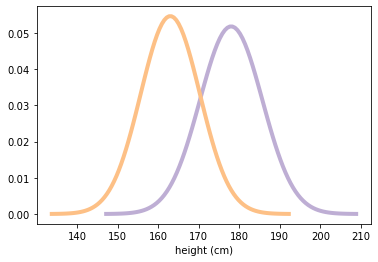

In [8]:
# Male height
xs, ys = evaluate_PDF(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_PDF(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')

## Un-standardized or Simple Effect Size Calculation

An unstandardized effect size simply tries to find the difference between two groups by calculating the difference between distribution means. Here is how you can do it in Python.

In [9]:
male_sample = male_height.rvs(1000)

In [10]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1
# (177.88791390576085, 7.222274730410271)

(178.1488568298319, 7.536191799654628)

The sample mean is close to the population mean

In [11]:
female_sample = female_height.rvs(1000)
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2
# (162.91903182040372, 7.261850929417819)

(163.51710453191882, 7.2777753346508)

There are many ways to describe the magnitude of the difference between these distributions. 
An obvious one is the difference in the means.

In [12]:
difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means # in cm
# 14.968882085357137

14.631752297913096

This shows that, on average, men are around 15 centimeters taller.

For some applications, that would be a good way to describe the difference, but there are caveats:

* Without knowing more about the distributions (like the standard deviations or _spread_ of each distribution), it's hard to interpret whether a difference like 15 cm is a **big difference** or not.

* The magnitude of the difference depends on the units of measure, making it hard to compare across different studies that may be conducted with different units of measurement.

There are a number of ways to quantify the difference between distributions.  A simple option is to express the difference as a percentage of the mean.

Let's figure out the relative difference in the means of two populations, scaled by the mean of male heights and expressed as a percentage. 

In [13]:
relative_difference = difference_in_means / male_sample.mean()
relative_difference * 100   # percent

8.21321705807485

You get a differenbt picture, when you take the relative difference from febmae. 
So, which one to choose?

In [14]:
relative_difference = difference_in_means / female_sample.mean()
relative_difference * 100    # percent

8.94814786489627

 Perhaps we can look for the amount of overlap between the two distributions. To define overlap, you choose a threshold between the two means. The simple threshold is the midpoint between the means:

In [15]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.83298068087538

A better, but slightly more complicated threshold is the place where the PDFs cross.

In [16]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.70536173615383

There's not much difference between the two thresholds.
Count how many men are below the threshold for males.

In [17]:
male_below_thresh = sum(male_sample < thresh)
male_below_thresh

161

In [18]:
female_above_thresh = sum(female_sample > thresh)
female_above_thresh

164

Now, take a look at what these thresholds look like when laid over the Probability Density Functions of both samples' distributions.

Text(0.5, 0, 'height (cm)')

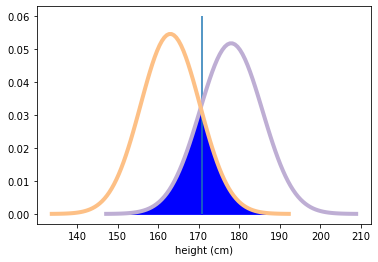

In [19]:
# Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')

The "overlap" (shaded region above) is the total **AUC (Area Under the Curves)**. You can use this to identify the samples that end up on the wrong side of the threshold. You can calculate the amount of overlap as shown below

In [20]:
# Calculate the overlap 
overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)
overlap

0.325

Or in more practical terms, you might report the fraction of people who would be misclassified if you tried to use height to guess sex:

In [21]:
misclassification_rate = overlap / 2
misclassification_rate

0.1625

# Non Parfameteric Test: Probabaility of Superiority

Another "non-parametric" way to quantify the difference between distributions is what's called **"probability of superiority"**, which is the probability that *"a randomly-chosen man is taller than a randomly-chosen woman"*, which makes perfect sense.

> Question: If you chose a male and a female sample at random, what is the probability that males are taller than females?

In [22]:
sum(x > y for x, y in zip(male_sample, female_sample)) / len(male_sample)

0.913

> Question: If you chose a female and a male sample at random, what is the probability that females are smaller than males in height? Is it different/same as above?

In [24]:
sum(x > y for x, y in zip(male_sample, female_sample)) / len(female_sample)

0.913

Overlap (or misclassification rate) as shown above and "probability of superiority" have two good properties:

* As probabilities, they don't depend on units of measure, so they are comparable between studies.

* They are expressed in operational terms, so a reader has a sense of what practical effect the difference makes.

There is one other common way to express the difference between distributions (i.e. the difference in means) standardizing by dividing by the standard deviation.

In [26]:
def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [27]:
overlap_superiority(male_height, female_height, n=1000)

170.5


(0.321, 0.928)

# Standardizing Effect Size

## Standardized effect size

When analysts generally talk about effect sizes, they refer to some method of calculating a *standardized* effect size. The standardized effect size statistic would divide effect size by some standardizer i.e. standard deviation:

>**Effect Size / Standardiser**

When interpreting, this statistic would be in terms of standard deviations e.g. The mean height of males in USA is 1.4 standard deviations higher than mean female heights etc. The effect size measure you will be learning about in this lesson is Cohen’s d. This measure expresses the size of an effect in terms of the number of standard deviations, similar to a $z$-score in statistics.

Cohen’s d is similar to the unpaired t test t value. It relies on Standard Deviations instead of Standard Errors

## Cohen's d

Cohen’s d is one of the most common ways to measure effect size.  As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable. 

The basic formula to calculate Cohen’s $d$ is:

> **$d$ = effect size (difference of means) / pooled standard deviation**

The denominator is the **standardiser**, and it is important to select the most appropriate one for a given dataset. The pooled standard deviation is the average spread of all data points around their group mean (not the overall mean). 

In [28]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()


    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

Computing the denominator is a little complicated; in fact, people have proposed several ways to do it.  [Here](https://scientificallysound.org/2017/07/13/cohens-d-standardiser/) is a brief description of using standardizers while calculating Cohen's $d$ for standardized effect sizes.  

This implementation uses the "pooled standard deviation," which is a weighted average of the standard deviations of the two groups.

And here's the result for the difference in height between men and women.

In [30]:
Cohen_d(male_sample, female_sample)

1.9750991040242767

## Interpreting $d$
Most people don't have a good sense of how big $d=2.0$ is. If you are having trouble visualizing what the result of Cohen’s D means, use these general “rule of thumb” guidelines (which Cohen said should be used cautiously):

>**Small effect = 0.2**

>**Medium Effect = 0.5**

>**Large Effect = 0.8**

Here is an excellent online visualization tool developed by [Kristoffer Magnusson](https://rpsychologist.com/d3/cohend/) to help interpret the results of cohen's $d$ statistic. 

The following function that takes Cohen's $d$, plots normal distributions with the given effect size, and prints their overlap and superiority.

In [31]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)

2.5
overlap 1.988
superiority 0.0


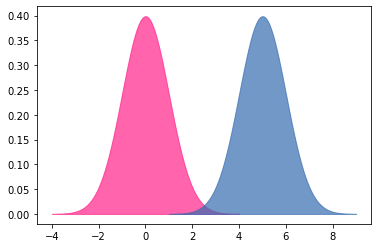

In [32]:
plot_pdfs(5)
# Try changing the d value and observe the effect on the outcome below

In [33]:
Cohen's $d$ has a few nice properties:

* Because mean and standard deviation have the same units, their ratio is dimensionless, so you can compare $d$ across different studies.

* In fields that commonly use $d$, people are calibrated to know what values should be considered big, surprising, or important.

* Given $d$ (and the assumption that the distributions are normal), you can compute overlap, superiority, and related statistics.

SyntaxError: EOL while scanning string literal (<ipython-input-33-df289dbaaaec>, line 1)